# 线性回归实战

In [11]:
#导入工具包
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from ylml.LossFunction import MSE
from ylml.Optim import SGD,MB_SGD
from ylml.ml import Train,LinearRegression,LinearRegDataset
from ylml.ylnn import LinearRegression_
from ylml.ylnn import Linear
import numpy as np

## 构造线性回归数据集并展示

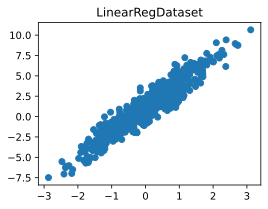

In [12]:
linearRegdataset = LinearRegDataset(500,1,3,1,128)
linearRegdataloader = linearRegdataset.get_dataloader()
linearRegdataset.show_dataset()

## 定义模型损失函数与优化器

In [13]:
#定义设备(CPU，GPU)
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
#定义损失函数MSE(均方差损失)
loss_function = MSE
loss_function_ = nn.MSELoss()
#定义模型
input_num = 1
output_num = 1
model1 = LinearRegression_(input_num,output_num).to(device)
model1_ = LinearRegression_(input_num,output_num).to(device)
model2 = LinearRegression(input_num,output_num)
model2.model.weight.data.normal_(0,1)
model2.model.bias.data.fill_(0)
#定义优化器
optimizer1 = SGD(model1.parameters(),128,0.1)#手动构建的随机梯度下降优化器
optimizer2 = MB_SGD(model1.parameters(),0.0001)#手动构建的小批量随机梯度下降优化器
optimizer3 = torch.optim.SGD(model2.parameters(),0.0001)#torch.optim模块中的SGD
#定义训练器
train = Train(50,loss_function,optimizer1,model1,task_type = 'REG',device = device)
#开始训练
train.start_train(linearRegdataloader)

Start Train!
Train_set Epoch [0/50] loss: 19.7912654876709
Train_set Epoch [1/50] loss: 17.523998260498047
Train_set Epoch [2/50] loss: 17.058345794677734
Train_set Epoch [3/50] loss: 18.333782196044922
Train_set Epoch [4/50] loss: 17.02321434020996
Train_set Epoch [5/50] loss: 17.767698287963867
Train_set Epoch [6/50] loss: 18.19977378845215
Train_set Epoch [7/50] loss: 16.264110565185547
Train_set Epoch [8/50] loss: 14.652688026428223
Train_set Epoch [9/50] loss: 14.7142333984375
Train_set Epoch [10/50] loss: 20.428699493408203
Train_set Epoch [11/50] loss: 18.586057662963867
Train_set Epoch [12/50] loss: 14.984289169311523
Train_set Epoch [13/50] loss: 16.603572845458984
Train_set Epoch [14/50] loss: 16.340717315673828
Train_set Epoch [15/50] loss: 17.406396865844727
Train_set Epoch [16/50] loss: 17.038047790527344
Train_set Epoch [17/50] loss: 12.764969825744629
Train_set Epoch [18/50] loss: 14.042604446411133
Train_set Epoch [19/50] loss: 13.982110977172852
Train_set Epoch [20/50]

## 展示训练过程中损失值变化曲线

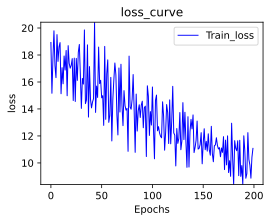

In [14]:
train.show_loss_value()

## 展示线性回归结果

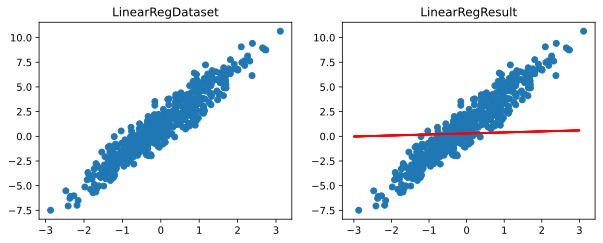

In [15]:
linearRegdataset.show_result(model1.params)

## 导出模型参数的json文件

In [16]:
model1.get_weight_json()

## 指定模型权重参数json文件路径并加载模型权重参数

In [17]:
weight_json_file_path = 'LinearRegression_0.json'
model1_.load_weight_json(weight_json_file_path,device)
print(model1_.params)

[tensor([[0.1032]], requires_grad=True), tensor([[0.2901]], requires_grad=True)]


In [18]:
#接着之前训练
optimizer1_ = SGD(model1_.parameters(),128,0.1)#手动构建的随机梯度下降优化器
train_ = Train(200,loss_function,optimizer1_,model1_,task_type = 'REG',device = device)
train_.start_train(linearRegdataloader,2)

Start Train!
Train_set Epoch [0/200] loss: 10.154094696044922
Train_set Epoch [1/200] loss: 8.931471824645996
Train_set Epoch [2/200] loss: 10.440736770629883
Train_set Epoch [3/200] loss: 9.231822967529297
Train_set Epoch [4/200] loss: 9.962494850158691
Train_set Epoch [5/200] loss: 9.794700622558594
Train_set Epoch [6/200] loss: 8.937064170837402
Train_set Epoch [7/200] loss: 9.557575225830078
Train_set Epoch [8/200] loss: 8.085021018981934
Train_set Epoch [9/200] loss: 10.34006404876709
Train_set Epoch [10/200] loss: 8.94845199584961
Train_set Epoch [11/200] loss: 8.417082786560059
Train_set Epoch [12/200] loss: 8.670568466186523
Train_set Epoch [13/200] loss: 8.96868896484375
Train_set Epoch [14/200] loss: 9.801065444946289
Train_set Epoch [15/200] loss: 7.654609203338623
Train_set Epoch [16/200] loss: 7.331841468811035
Train_set Epoch [17/200] loss: 6.51729679107666
Train_set Epoch [18/200] loss: 7.907822132110596
Train_set Epoch [19/200] loss: 6.494009017944336
Train_set Epoch [2

Train_set Epoch [172/200] loss: 1.7679331302642822
Train_set Epoch [173/200] loss: 2.246502161026001
Train_set Epoch [174/200] loss: 2.283482074737549
Train_set Epoch [175/200] loss: 2.203747034072876
Train_set Epoch [176/200] loss: 2.1200273036956787
Train_set Epoch [177/200] loss: 2.0706627368927
Train_set Epoch [178/200] loss: 1.6622045040130615
Train_set Epoch [179/200] loss: 1.59372079372406
Train_set Epoch [180/200] loss: 1.6531521081924438
Train_set Epoch [181/200] loss: 1.650298833847046
Train_set Epoch [182/200] loss: 1.9617619514465332
Train_set Epoch [183/200] loss: 1.8642479181289673
Train_set Epoch [184/200] loss: 1.6014777421951294
Train_set Epoch [185/200] loss: 2.1069321632385254
Train_set Epoch [186/200] loss: 1.5697505474090576
Train_set Epoch [187/200] loss: 1.6964777708053589
Train_set Epoch [188/200] loss: 1.6642305850982666
Train_set Epoch [189/200] loss: 1.9304609298706055
Train_set Epoch [190/200] loss: 1.5808372497558594
Train_set Epoch [191/200] loss: 1.740242

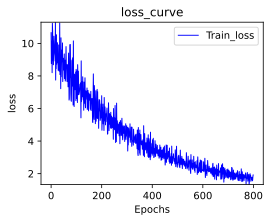

In [19]:
#展示训练过程中损失值变化曲线
train_.show_loss_value()

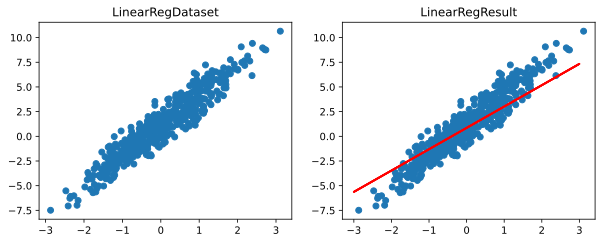

In [20]:
#展示线性回归结果
linearRegdataset.show_result(model1_.params)